In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
df = pd.read_csv('term_deposit_subscription.csv')

In [232]:
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [234]:
df.columns

Index(['Id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [235]:
df.shape

(45211, 18)

## Data Cleaning
### 1. Missing values
### 2. Outliers

In [236]:
df.isna().sum()

Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [237]:
# drop rows with null values

df.dropna(subset=['age', 'balance'], inplace=True)

In [238]:
# change 'age' column from float to int type

df['age'] = df['age'].astype(int)
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [239]:
# remove rows with 'age' column values greater than 100 or less than 0

del_index = df[(df['age'] > 100) | (df['age'] < 0)].index
df.drop(del_index, inplace=True)

In [240]:
df['pdays'].value_counts()

-1      36940
 182      167
 92       147
 91       126
 183      126
        ...  
 465        1
 529        1
 18         1
 434        1
 831        1
Name: pdays, Length: 559, dtype: int64

In [241]:
# replace values that are less than 0 or negative in 'pdays' column 
# these are clients that were never contacted
# replace with a common value that is extremely high
# in this case 5000 (5000 days is approximately 13.6 years)

df['pdays'] = df['pdays'].apply(lambda x: 5000 if x<0 else x)
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,1002,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,5000,0,unknown,no
2,1003,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,5000,0,unknown,no
3,1004,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,5000,0,unknown,no
4,1005,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,5000,0,unknown,no
5,1006,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,5000,0,unknown,no


In [242]:
df['job'].value_counts()

blue-collar      9730
management       9456
technician       7594
admin.           5169
services         4153
retired          2262
self-employed    1579
entrepreneur     1485
unemployed       1303
housemaid        1240
student           937
unknown           288
Name: job, dtype: int64

In [243]:
df['education'].value_counts()

secondary    23197
tertiary     13295
primary       6849
unknown       1855
Name: education, dtype: int64

In [244]:
df['contact'].value_counts()

cellular     29282
unknown      13008
telephone     2906
Name: contact, dtype: int64

In [245]:
df['poutcome'].value_counts()

unknown    36945
failure     4900
other       1840
success     1511
Name: poutcome, dtype: int64

4 of the features i.e. **job**, **education**, **contact** and **poutcome** have the value 'unknown'. The number of records with this value is low (<2%) in proportion to the overall number of records in 2 of these columns i.e. **job** and **education**, as can be observed above. Therefore, the value 'unknown' in these 2 columns is replaced with the mode of the respective column.

For 2 of the other features i.e. **contact** and **poutcome**, the value 'unknown' is found in a substantial number of records. For the feature **contact**, 'unknown' is replaced by the mode i.e. 'cellular' since it is the most widely used communication medium these days and also occurs much more frequently in the **contact** column as compared to the only other contact medium i.e. telephone. On the other hand, for feature **poutcome**, the value 'unknown' is found in about 90% of the records. Therefore, the column itself is dropped, since it will not contribute to the target variable predictions

In [246]:
df['job']=df['job'].replace('unknown', df['job'].mode()[0])
df['education']=df['education'].replace('unknown', df['education'].mode()[0])
df['contact']=df['contact'].replace('unknown', df['contact'].mode()[0])

In [247]:
df = df.drop(['poutcome'], axis=1)

In [248]:
# drop the column 'day' which is the day of the month of last contact
# as there's already a columnn 'month' for the last month of contact

df = df.drop(['day'], axis=1)
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,y
1,1002,44,technician,single,secondary,no,29.0,yes,no,cellular,may,151,1,5000,0,no
2,1003,33,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,may,76,1,5000,0,no
3,1004,47,blue-collar,married,secondary,no,1506.0,yes,no,cellular,may,92,1,5000,0,no
4,1005,33,blue-collar,single,secondary,no,1.0,no,no,cellular,may,198,1,5000,0,no
5,1006,35,management,married,tertiary,no,231.0,yes,no,cellular,may,139,1,5000,0,no


In [249]:
df.to_csv('clean_data.csv', index=False)

## Exploratory Data Analysis
### 1. Univariate Analysis
### 2. Bivariate Analysis
### 3. Multivariate Analysis

In [250]:
df_num = df[['age', 'balance', 'duration', 'campaign',
       'pdays', 'previous']]
df_num.describe()

,age,balance,duration,campaign,pdays,previous
count,45196.000000,45196.000000,45196.000000,45196.000000,45196.000000,45196.000000
mean,40.935879,1362.562129,258.137645,2.764404,4127.672759,0.580339
std,10.617774,3045.192527,257.448929,3.098377,1845.876915,2.303536
min,18.000000,-8019.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,5000.000000,0.000000
50%,39.000000,449.000000,180.000000,2.000000,5000.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,5000.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,5000.000000,275.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>]], dtype=object)

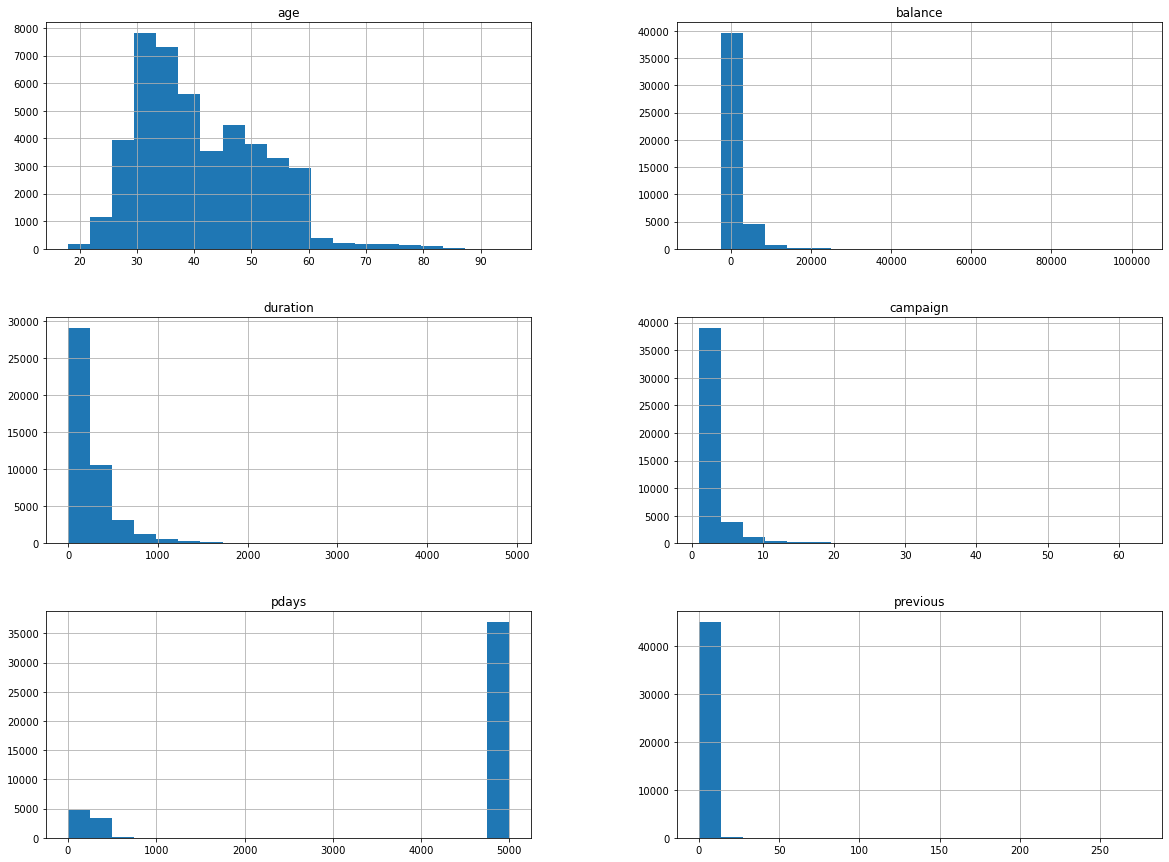

In [251]:
# histograms to understand shape of data distributions for numeric features

df_num.hist(bins=20, figsize=(20, 15))

<AxesSubplot:>

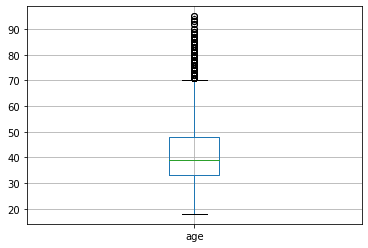

In [252]:
# boxplots to understand distribution of data for select numeric features

df.boxplot(column = ['age'])

<AxesSubplot:>

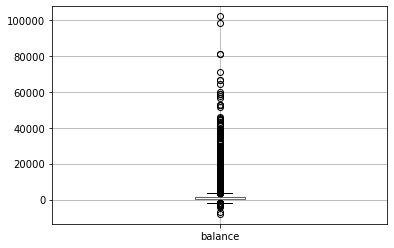

In [253]:
df.boxplot(column = ['balance'])

<AxesSubplot:>

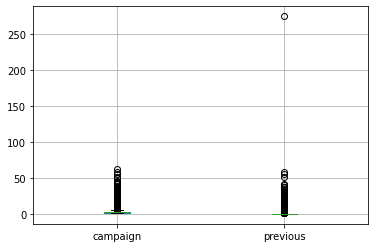

In [254]:
df.boxplot(column = ['campaign', 'previous'])

In [255]:
df_cat = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']]

graph for job: Total = 11


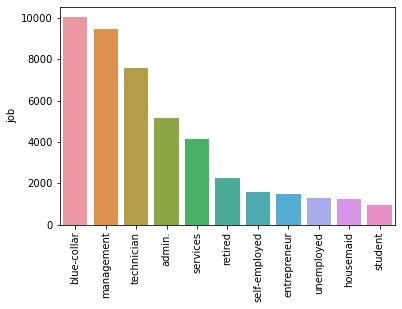

graph for marital: Total = 3


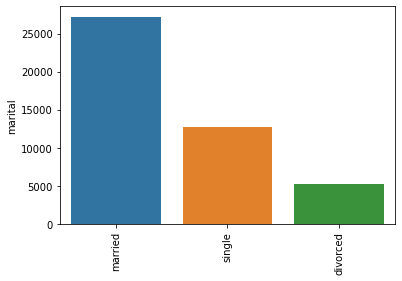

graph for education: Total = 3


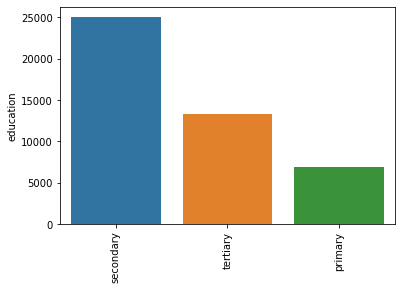

graph for default: Total = 2


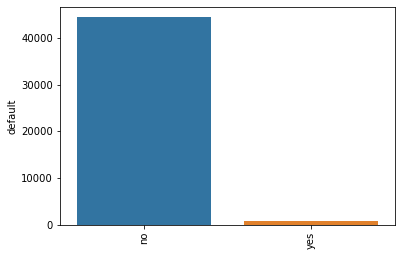

graph for housing: Total = 2


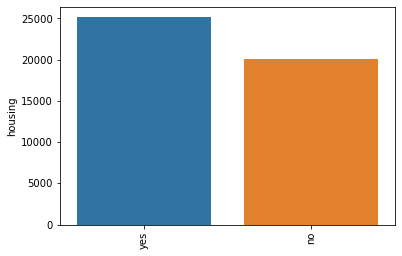

graph for loan: Total = 2


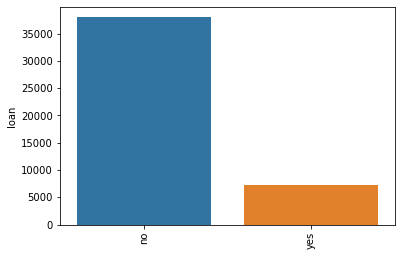

graph for contact: Total = 2


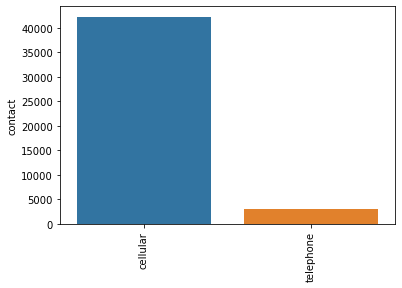

graph for month: Total = 12


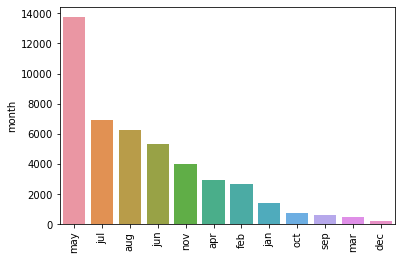

graph for y: Total = 2


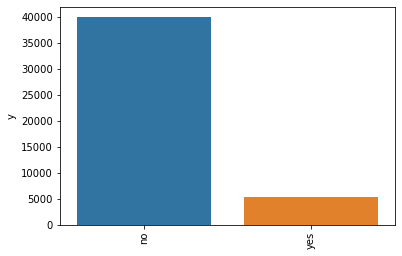

In [256]:
#bar-plots for each categorical feature

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: Total = %d' %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

               age   balance  duration  campaign     pdays  previous
age       1.000000  0.097740 -0.004700  0.004790 -0.001913  0.001065
balance   0.097740  1.000000  0.021612 -0.014632 -0.031372  0.016615
duration -0.004700  0.021612  1.000000 -0.084561 -0.003882  0.001216
campaign  0.004790 -0.014632 -0.084561  1.000000  0.108293 -0.032863
pdays    -0.001913 -0.031372 -0.003882  0.108293  1.000000 -0.533211
previous  0.001065  0.016615  0.001216 -0.032863 -0.533211  1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

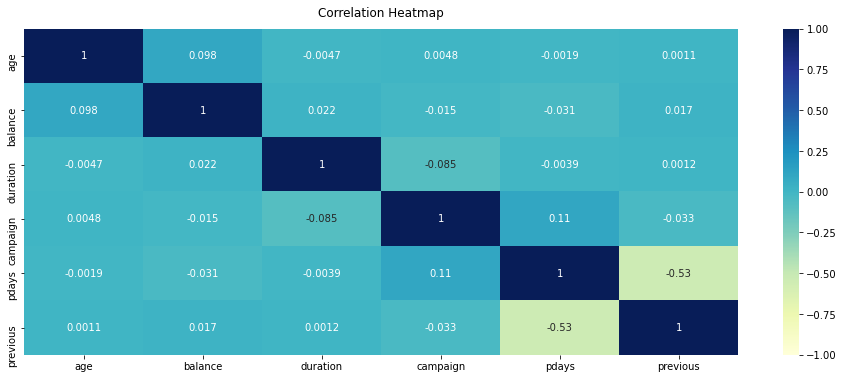

In [257]:
# correlation heatmap to understand correlations among numeric features

print(df_num.corr())
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_num.corr(), cmap = 'YlGnBu', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [258]:
# average ages of clients by subscription to term deposit-yes/no

pd.pivot_table(df, index='y', values='age')

,age
y,
no,40.838537
yes,41.670829


<AxesSubplot:xlabel='job'>

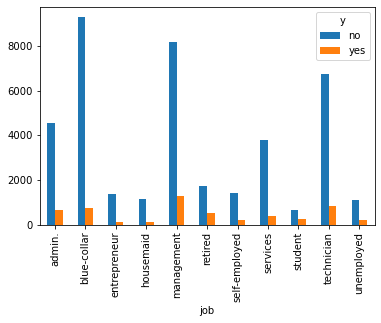

In [259]:
# bar plots for counts of clients with subscription to term deposit-yes/no by job categories

pt1 = pd.pivot_table(df, index='job', columns='y', values='age', aggfunc='count')
pt1.plot.bar()

<AxesSubplot:xlabel='education'>

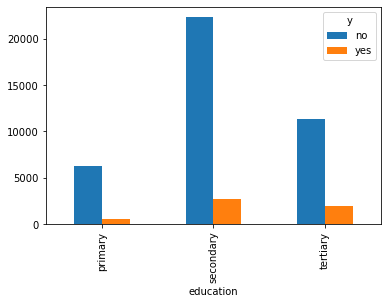

In [260]:
# bar plots for counts of clients with subscription to term deposit-yes/no by education levels

pt2 = pd.pivot_table(df, index='education', columns='y', values='age', aggfunc='count')
pt2.plot.bar()

<AxesSubplot:xlabel='marital'>

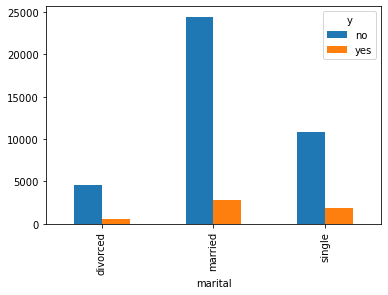

In [261]:
# bar plots for counts of clients with subscription to term deposit-yes/no by marital status

pt3 = pd.pivot_table(df, index='marital', columns='y', values='age', aggfunc='count')
pt3.plot.bar()

<AxesSubplot:xlabel='default'>

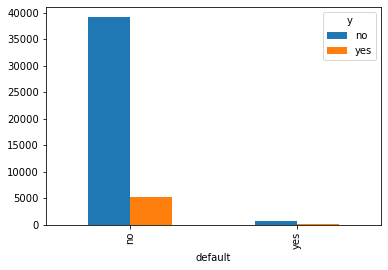

In [262]:
# bar plots for counts of clients with subscription to term deposit-yes/no by credit default status

pt4 = pd.pivot_table(df, index='default', columns='y', values='age', aggfunc='count')
pt4.plot.bar()

In [263]:
# counts of clients with subscription to term deposit-yes/no
# by housing and personal loan bearing status

pd.pivot_table(df, index=['housing','loan'], columns='y', values='age', aggfunc='count')

y                no   yes
housing loan             
no      no    14069  3133
        yes    2657   218
yes     no    19083  1670
        yes    4101   265

In [264]:
# counts of campaign contacts with subscription to term deposit-yes/no by job categories and education

pd.pivot_table(df, index=['job','education'], columns='y', values='campaign', aggfunc='sum')

y                           no   yes
job           education             
admin.        primary      559    26
              secondary  10312  1089
              tertiary    1148   181
blue-collar   primary    10768   512
              secondary  15548  1033
              tertiary     436    69
entrepreneur  primary      494    62
              secondary   1604   155
              tertiary    1710   136
housemaid     primary     1705   112
              secondary   1091   122
              tertiary     426    42
management    primary      683    51
              secondary   3464   296
              tertiary   20045  2550
retired       primary     1561   367
              secondary   2152   417
              tertiary     633   181
self-employed primary      405    11
              secondary   1687   121
              tertiary    2019   262
services      primary      868    65
              secondary   9200   661
              tertiary     439    58
student       primary       88    31
              secondary   1147   376
              tertiary     384   130
technician    primary      394    31
              secondary  14508  1141
              tertiary    5367   638
unemployed    primary      543    80
              secondary   1608   215
              tertiary     624    99

In [265]:
# counts of pre-campaign contacts with subscription to term deposit-yes/no by job categories
# and education

pd.pivot_table(df, index=['job','education'], columns='y', values='previous', aggfunc='sum')

y                          no   yes
job           education            
admin.        primary     107    38
              secondary  2215   632
              tertiary    342   139
blue-collar   primary    1666   201
              secondary  2609   427
              tertiary     87    18
entrepreneur  primary      78     1
              secondary   257    47
              tertiary    286    42
housemaid     primary     136    32
              secondary   164    31
              tertiary     76    22
management    primary     109    18
              secondary   665   178
              tertiary   3842  1506
retired       primary     297   227
              secondary   371   300
              tertiary    131   112
self-employed primary      65     1
              secondary   276    29
              tertiary    347   153
services      primary     132    34
              secondary  1498   322
              tertiary     68    28
student       primary      32    31
              secondary   395   244
              tertiary    108    84
technician    primary      74    22
              secondary  2354   670
              tertiary    906   339
unemployed    primary      27    24
              secondary   217   171
              tertiary    110    59

In [266]:
# counts of campaign contacts with subscription to term deposit-yes/no by job categories
# and marital status

pd.pivot_table(df, index=['job','marital'], columns='y', values='campaign', aggfunc='sum')

y                          no   yes
job           marital              
admin.        divorced   1607   188
              married    6634   625
              single     3778   483
blue-collar   divorced   1866   114
              married   19872  1051
              single     5014   449
entrepreneur  divorced    445    43
              married    2852   255
              single      511    55
housemaid     divorced    423    46
              married    2488   186
              single      311    44
management    divorced   2795   302
              married   13983  1545
              single     7414  1050
retired       divorced    775   254
              married    3335   685
              single      236    26
self-employed divorced    298    42
              married    2950   194
              single      863   158
services      divorced   1291    92
              married    6472   411
              single     2744   281
student       divorced     13     3
              married     121    19
              single     1485   515
technician    divorced   2539   171
              married   10953   875
              single     6777   764
unemployed    divorced    330    61
              married    1648   206
              single      797   127

In [267]:
# counts of pre-campaign contacts with subscription to term deposit-yes/no by job categories
# and marital status

pd.pivot_table(df, index=['job','marital'], columns='y', values='previous', aggfunc='sum')

y                         no  yes
job           marital            
admin.        divorced   365   95
              married   1140  452
              single    1159  262
blue-collar   divorced   392   41
              married   3102  413
              single     868  192
entrepreneur  divorced    55   12
              married    456   35
              single     110   43
housemaid     divorced    58   16
              married    278   47
              single      40   22
management    divorced   574  135
              married   2676  951
              single    1366  616
retired       divorced   147  100
              married    612  528
              single      40   11
self-employed divorced    62   22
              married    448   96
              single     178   65
services      divorced   226   64
              married    952  211
              single     520  109
student       divorced     3    0
              married     42   14
              single     490  345
technician    divorced   366   65
              married   1741  589
              single    1227  377
unemployed    divorced    60   13
              married    189  166
              single     105   75

In [268]:
# average duration of last calls to clients by subscription to term deposit-yes/no

pd.pivot_table(df, index='y', values='duration')

,duration
y,
no,221.147331
yes,537.419410


<AxesSubplot:xlabel='contact'>

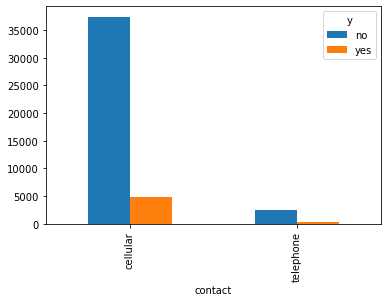

In [269]:
# bar plots for counts of clients with subscription to term deposit-yes/no by contact types

pt5 = pd.pivot_table(df, index='contact', columns='y', values='age', aggfunc='count')
pt5.plot.bar()

<AxesSubplot:xlabel='month'>

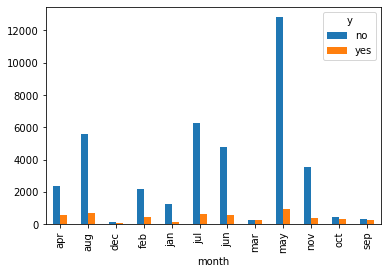

In [270]:
# bar plots for counts of clients with subscription to term deposit-yes/no by last month of contact

pt6 = pd.pivot_table(df, index='month', columns='y', values='age', aggfunc='count')
pt6.plot.bar()